# Understanding the Covariance Matrix

This notebook aims to explain the concept of the covariance matrix, how to calculate it using NumPy, and how to interpret its components, including eigenvalues and eigenvectors.

## 1. What is Covariance?

Covariance measures the degree to which two random variables change together. If the variables tend to show similar behavior (i.e., when one increases, the other tends to increase), the covariance is positive. If they tend to show opposite behavior (i.e., when one increases, the other tends to decrease), the covariance is negative. If the variables are independent, the covariance is zero (though zero covariance doesn't necessarily imply independence).

The formula for the sample covariance between two variables X and Y is:

$$ \text{cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) $$

## 2. What is the Covariance Matrix?

For a dataset with multiple variables (features), the covariance matrix organizes the covariances between all pairs of variables. For a dataset with $d$ variables ($X_1, X_2, ..., X_d$), the covariance matrix $\Sigma$ (or S for the sample covariance matrix) is a $d \times d$ symmetric matrix where:

*   The element at position $(i, j)$ is the covariance between variable $X_i$ and variable $X_j$: $\Sigma_{ij} = \text{cov}(X_i, X_j)$.
*   The diagonal elements $(i, i)$ are the variances of each variable: $\Sigma_{ii} = \text{cov}(X_i, X_i) = \text{var}(X_i)$.

Example for 3 variables (X, Y, Z):

$$ S = \begin{pmatrix}
\text{var}(X) & \text{cov}(X, Y) & \text{cov}(X, Z) \\
\text{cov}(Y, X) & \text{var}(Y) & \text{cov}(Y, Z) \\
\text{cov}(Z, X) & \text{cov}(Z, Y) & \text{var}(Z)
\end{pmatrix} $$

Since $\text{cov}(X, Y) = \text{cov}(Y, X)$, the matrix is always symmetric.

### Example

To understand the covariance matrix in a practical context, let's work with a simulated dataset. We will generate data representing a group of students, focusing on three key variables:

1.  **Study Hours:** The average number of hours spent studying per week.
2.  **Party Hours:** The average number of hours spent partying or on leisure activities per week.
3.  **Math Grade:** The final grade received in a math course.

Our goal is to calculate the covariance matrix for these variables and interpret what it tells us about their relationships. For example, we'll investigate whether students who study more tend to party less, or if higher study hours are associated with better math grades, based on our generated data.

In [42]:
# First, we'll generate the dataset, and then we will compute and analyze the covariance matrix.
# Import libraries
import numpy as np
import pandas as pd

# --- Configuration ---
n_students = 150
random_seed = 42
np.random.seed(random_seed) # Fix the random seed for reproducibility

# --- Generate Base Data ---
# Generate study hours (e.g., normally distributed around 12 hours/week)
# We generate floats first, then clip and convert to int
study_hours_raw = np.random.normal(loc=12, scale=4, size=n_students)

# Generate party hours - negatively correlated with study hours
# More study -> less party. Add noise.
# Base party hours around 15, decrease by ~0.8 for each study hour
party_hours_raw = 15 - 0.8 * study_hours_raw + np.random.normal(loc=0, scale=2.5, size=n_students)

# Generate math grade (scale 0-20)
# Positively correlated with study hours, negatively with party hours. Add noise.
# Base grade around 10. Increase by ~0.5 per study hour, decrease by ~0.2 per party hour.
math_grade_raw = 10 + 0.5 * study_hours_raw - 0.2 * party_hours_raw + np.random.normal(loc=0, scale=3, size=n_students)

# --- Apply Constraints ---
# Clip hours to be non-negative and convert to integer
study_hours = np.clip(study_hours_raw, 0, None).astype(int)
party_hours = np.clip(party_hours_raw, 0, None).astype(int)

# Clip grades to be between 0 and 20 (inclusive) and convert to integer
math_grade = np.clip(math_grade_raw, 0, 20).astype(int)

# --- Create DataFrame ---
df_students = pd.DataFrame({
    'Study_Hours': study_hours,
    'Party_Hours': party_hours,
    'Math_Grade': math_grade
})

# --- Display Sample Data (Optional) ---
print("Student Data (First 5 Rows):")
print(df_students.head())

print(f"\n We have {len(df_students)} students.")

Student Data (First 5 Rows):
   Study_Hours  Party_Hours  Math_Grade
0           13            4          13
1           11            6          12
2           14            1          19
3           18            1          20
4           11            6          14

 We have 150 students.



------------------------------------
Calculated Covariance Matrix:
------------------------------------
             Study_Hours  Party_Hours  Math_Grade
Study_Hours    14.239866   -10.106846    8.256913
Party_Hours   -10.106846    12.487875   -6.677226
Math_Grade      8.256913    -6.677226   12.359016
------------------------------------

Visualizing Pairwise Relationships...


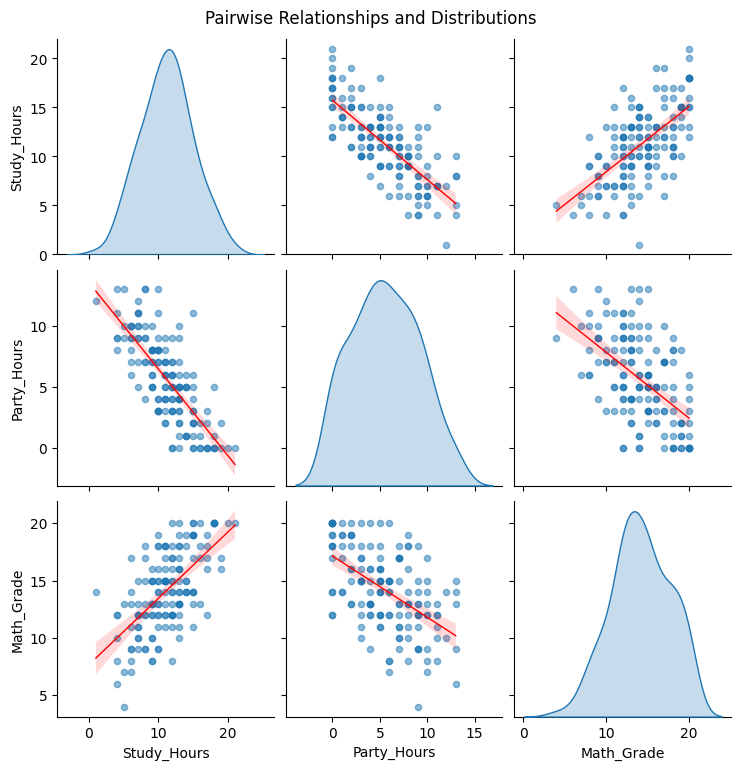


Visualizing Covariance Matrix as Heatmap...


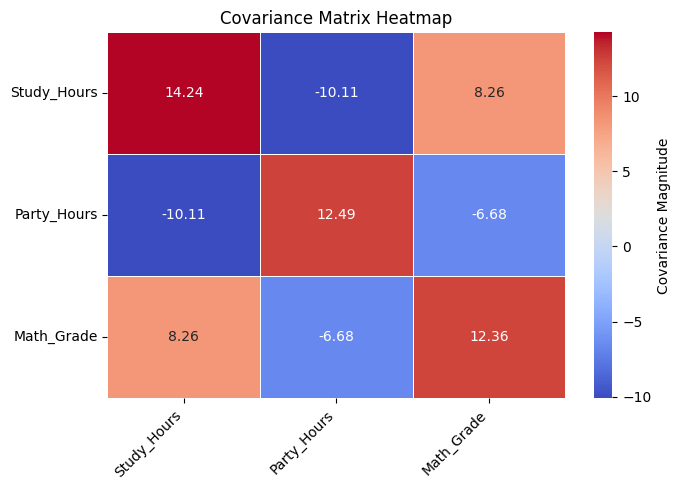


--- Analysis of the Covariance Matrix ---

1. Variances (Diagonal Elements):
   - Var(Study_Hours): 14.24. This measures the spread or variability in study hours among students.
   - Var(Party_Hours): 12.49. This measures the spread in party hours.
   - Var(Math_Grade): 12.36. This measures the spread in math grades (on the 0-20 scale).
   -> Larger values indicate greater variability in that specific variable.

2. Covariances (Off-Diagonal Elements):

   - Cov(Study_Hours, Party_Hours): -10.11
     Interpretation: Negative covariance suggests an inverse linear relationship. As study hours tend to increase, party hours tend to decrease, and vice-versa. This matches our expectation.

   - Cov(Study_Hours, Math_Grade): 8.26
     Interpretation: Positive covariance suggests a direct linear relationship. As study hours tend to increase, math grades also tend to increase. This aligns with expectations.

   - Cov(Party_Hours, Math_Grade): -6.68
     Interpretation: Negative covariance sugge

In [16]:
# Import necessary libraries for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Covariance Calculation ---
# Calculate the covariance matrix using pandas .cov() method
# This uses the sample covariance formula (N-1 denominator) by default
covariance_matrix = df_students.cov()

print("\n------------------------------------")
print("Calculated Covariance Matrix:")
print("------------------------------------")
print(covariance_matrix)
print("------------------------------------")


# --- Visualization ---

# 1. Pairplot to visualize relationships and distributions
print("\nVisualizing Pairwise Relationships...")
sns.pairplot(df_students, kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red', 'lw':1}, 'scatter_kws': {'alpha': 0.5, 's': 20}},
             diag_kws={'fill': True})
plt.suptitle('Pairwise Relationships and Distributions', y=1.02) # Adjust title position
plt.show()

# 2. Heatmap of the covariance matrix
print("\nVisualizing Covariance Matrix as Heatmap...")
plt.figure(figsize=(7, 5))
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5,
            cbar_kws={'label': 'Covariance Magnitude'})
plt.title('Covariance Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# --- Explanation ---

print("\n--- Analysis of the Covariance Matrix ---")

# Explain Diagonal Elements (Variances)
var_study = covariance_matrix.loc['Study_Hours', 'Study_Hours']
var_party = covariance_matrix.loc['Party_Hours', 'Party_Hours']
var_grade = covariance_matrix.loc['Math_Grade', 'Math_Grade']
print(f"\n1. Variances (Diagonal Elements):")
print(f"   - Var(Study_Hours): {var_study:.2f}. This measures the spread or variability in study hours among students.")
print(f"   - Var(Party_Hours): {var_party:.2f}. This measures the spread in party hours.")
print(f"   - Var(Math_Grade): {var_grade:.2f}. This measures the spread in math grades (on the 0-20 scale).")
print("   -> Larger values indicate greater variability in that specific variable.")

# Explain Off-Diagonal Elements (Covariances)
cov_study_party = covariance_matrix.loc['Study_Hours', 'Party_Hours']
cov_study_grade = covariance_matrix.loc['Study_Hours', 'Math_Grade']
cov_party_grade = covariance_matrix.loc['Party_Hours', 'Math_Grade']
print(f"\n2. Covariances (Off-Diagonal Elements):")

# Study vs Party
print(f"\n   - Cov(Study_Hours, Party_Hours): {cov_study_party:.2f}")
if cov_study_party < 0:
    print("     Interpretation: Negative covariance suggests an inverse linear relationship. As study hours tend to increase, party hours tend to decrease, and vice-versa. This matches our expectation.")
elif cov_study_party > 0:
     print("     Interpretation: Positive covariance suggests a direct linear relationship. As study hours tend to increase, party hours also tend to increase. (This would be unexpected here).")
else:
     print("     Interpretation: Covariance near zero suggests a weak or non-existent linear relationship between study and party hours.")

# Study vs Grade
print(f"\n   - Cov(Study_Hours, Math_Grade): {cov_study_grade:.2f}")
if cov_study_grade > 0:
    print("     Interpretation: Positive covariance suggests a direct linear relationship. As study hours tend to increase, math grades also tend to increase. This aligns with expectations.")
elif cov_study_grade < 0:
     print("     Interpretation: Negative covariance suggests an inverse linear relationship. As study hours tend to increase, math grades tend to decrease. (Unexpected).")
else:
     print("     Interpretation: Covariance near zero suggests a weak or non-existent linear relationship between study hours and math grade.")

# Party vs Grade
print(f"\n   - Cov(Party_Hours, Math_Grade): {cov_party_grade:.2f}")
if cov_party_grade < 0:
    print("     Interpretation: Negative covariance suggests an inverse linear relationship. As party hours tend to increase, math grades tend to decrease. This is plausible (more partying might lead to less study time or focus).")
elif cov_party_grade > 0:
     print("     Interpretation: Positive covariance suggests a direct linear relationship. As party hours tend to increase, math grades also tend to increase. (Less likely).")
else:
     print("     Interpretation: Covariance near zero suggests a weak or non-existent linear relationship between party hours and math grade.")


print("\n--- Summary of Covariance ---")
print(" - Positive Covariance: Indicates that two variables tend to move in the same direction (linearly).")
print(" - Negative Covariance: Indicates that two variables tend to move in opposite directions (linearly).")
print(" - Covariance Near Zero: Indicates a weak linear relationship.")
print("\nImportant Note: The magnitude of covariance is affected by the units and scale of the variables. A large covariance value doesn't automatically mean a *stronger* relationship than a smaller one if the variables have different scales. For assessing the *strength* of the linear relationship independent of scale, the Correlation Coefficient is typically used (which is derived from the covariance).")
print("\nThe visualizations (Pairplot and Heatmap) provide a graphical confirmation of these calculated relationships.")


## 3. Another example with generated data
Let's generate some 2-dimensional data using a specific mean vector and covariance matrix. This will allow us to see if the calculated covariance matrix matches the one we used to generate the data.

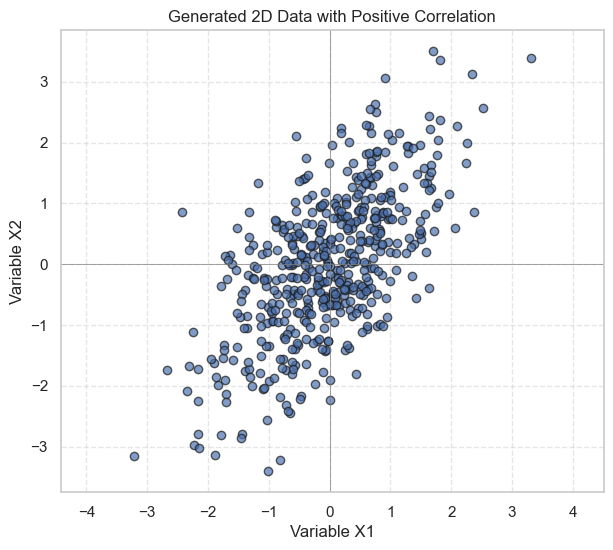

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_theme(style="whitegrid")

# Define the parameters for data generation
mean = [0, 0]  # Mean vector
cov_matrix = [[1.0, 0.8],  # Var(X1)=1.0, Cov(X1,X2)=0.8
              [0.8, 1.5]]  # Cov(X2,X1)=0.8, Var(X2)=1.5
n_samples = 500      # Number of data points

random_seed = 42
np.random.seed(random_seed) # Fix the random seed for reproducibility

# Generate multivariate normal data
# The shape of X will be (n_samples, n_features)
X = np.random.multivariate_normal(mean, cov_matrix, n_samples)

# Separate the variables for clarity
X1 = X[:, 0]
X2 = X[:, 1]

# Plot the data
plt.figure(figsize=(7, 6))
plt.scatter(X1, X2, alpha=0.7, edgecolors='k')
plt.title('Generated 2D Data with Positive Correlation')
plt.xlabel('Variable X1')
plt.ylabel('Variable X2')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal') # Important for visualizing correlations correctly
plt.show()

As seen in the plot, there's a general trend that as X1 increases, X2 also tends to increase, indicating a positive covariance, as defined in our `cov_matrix`.

## 4. Calculating the Covariance Matrix using NumPy

NumPy provides the `np.cov()` function to easily calculate the covariance matrix.

In [38]:
# Calculate the sample covariance matrix using NumPy
# We use rowvar=False because our data matrix X has observations as rows 
# and variables as columns (shape n_samples x n_features).
# We use ddof=1 to divide by (n-1) for the unbiased sample covariance.
S = np.cov(X, rowvar=False, ddof=1)

print("Calculated Sample Covariance Matrix:")
print(S)

# Verify the diagonal elements (variances)
print(f"\nVariance of X1 (calculated): {np.var(X1, ddof=1):.4f}")
print(f"Variance of X2 (calculated): {np.var(X2, ddof=1):.4f}")

# Verify the off-diagonal element (covariance)
# Manual calculation for verification
mean_x1 = np.mean(X1)
mean_x2 = np.mean(X2)
cov_x1x2_manual = np.sum((X1 - mean_x1) * (X2 - mean_x2)) / (n_samples - 1)
print(f"Covariance of X1, X2 (calculated): {cov_x1x2_manual:.4f}")

Calculated Sample Covariance Matrix:
[[0.92582352 0.73152795]
 [0.73152795 1.43218134]]

Variance of X1 (calculated): 0.9258
Variance of X2 (calculated): 1.4322
Covariance of X1, X2 (calculated): 0.7315


**Interpretation of the Calculated Matrix:**

*   The element `S[0, 0]` is the sample variance of variable X1.
*   The element `S[1, 1]` is the sample variance of variable X2.
*   The elements `S[0, 1]` and `S[1, 0]` are the sample covariance between X1 and X2 (they should be equal).

The calculated values should be close to the values in the covariance matrix we used to generate the data (`[[1.0, 0.8, [0.8, 1.5]]`). They won't be exactly the same due to random sampling.

## 5. Eigenvalues and Eigenvectors of the Covariance Matrix

Eigenvalues and eigenvectors provide important insights into the structure of the data:

*   **Eigenvectors:** Represent the directions of maximum variance in the data. These are the principal axes of the data distribution.
*   **Eigenvalues:** Indicate the amount of variance in the data along the directions defined by their corresponding eigenvectors. A larger eigenvalue means more variance along that eigenvector's direction.

These concepts are fundamental to Principal Component Analysis (PCA).

In [39]:
# Calculate eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(S)

print("Eigenvalues:", eigenvalues)
print("\nEigenvectors (each column is an eigenvector):")
print(eigenvectors)

Eigenvalues: [0.40490121 1.95310365]

Eigenvectors (each column is an eigenvector):
[[-0.81457405 -0.58005958]
 [ 0.58005958 -0.81457405]]


## 6. Visualizing Eigenvectors

We can plot the eigenvectors on the scatter plot of the data to visualize the principal axes and the spread along these axes. The length of the plotted vectors is often scaled by the square root of the corresponding eigenvalue (representing standard deviation).

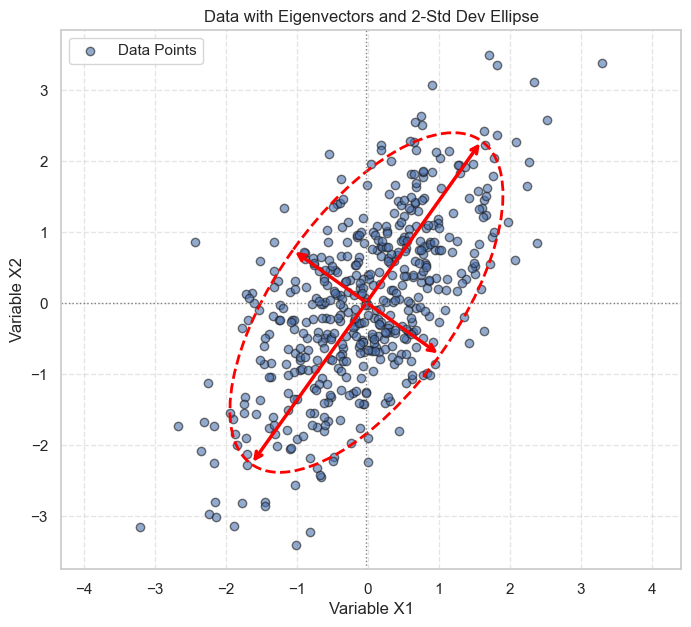

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import math # Import math for radians conversion later if needed internally by libraries

# # Assume X, S, X1, X2 are defined from the previous cells
# # For demonstration, let's redefine mock data if running standalone
# np.random.seed(42)
# mean = [2, 3]
# # Define a covariance matrix with positive covariance
# cov = [[1.0, 0.8],  # Var(X1), Cov(X1, X2)
#        [0.8, 1.5]]  # Cov(X2, X1), Var(X2)
# n_samples = 300
# X = np.random.multivariate_normal(mean, cov, n_samples)
# X1 = X[:, 0]
# X2 = X[:, 1]
# # Calculate sample covariance matrix
# S = np.cov(X, rowvar=False)


def plot_eigenvectors(data, cov_matrix, ax, n_std=2.0, **kwargs):
    """Plots eigenvectors and ellipses representing std deviations."""
    mean = np.mean(data, axis=0)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    order = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[order]
    eigenvectors = eigenvectors[:, order]

    # --- Plot Arrows for Eigenvectors ---
    # Plot eigenvectors scaled by sqrt(eigenvalue) * n_std
    # which represents the extent of the data along that principal axis
    for i in range(len(eigenvalues)):
        eigvec = eigenvectors[:, i]
        # eigenvalue corresponds to variance, sqrt(eigenvalue) is std dev
        length = np.sqrt(eigenvalues[i]) * n_std # Length of half-axis of ellipse
        start = mean

        # Plot arrow from mean along eigenvector direction
        end_pos = mean + eigvec * length
        ax.annotate(
            '', xy=end_pos, xycoords='data',
            xytext=start, textcoords='data',
            arrowprops=dict(arrowstyle="->", color='red', lw=2.5)
        )
        # Plot arrow from mean along negative eigenvector direction
        end_neg = mean - eigvec * length
        ax.annotate(
            '', xy=end_neg, xycoords='data',
            xytext=start, textcoords='data',
            arrowprops=dict(arrowstyle="->", color='red', lw=2.5)
        )

    # --- Plot Ellipse ---
    # eigenvalue corresponds to variance, sqrt(eigenvalue) is std dev
    # Width and height of the ellipse are 2 * n_std * std_dev along principal axes
    width, height = 2 * n_std * np.sqrt(eigenvalues)

    # Calculate angle of the first principal axis (eigenvector)
    # eigenvector[:, 0] is the first principal component (largest eigenvalue)
    # We need atan2(y, x) for the angle
    first_eigenvector = eigenvectors[:, 0]
    angle = np.degrees(np.arctan2(first_eigenvector[1], first_eigenvector[0]))

    # Draw the ellipse
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor='red', fc='None', lw=2, linestyle='--', **kwargs)
    ax.add_patch(ellipse)


# Plot the data again with eigenvectors and ellipse
fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter(X1, X2, alpha=0.6, edgecolors='k', label='Data Points')
plot_eigenvectors(X, S, ax, n_std=2.0) # Plot eigenvectors/ellipse for 2 std deviations
ax.set_title('Data with Eigenvectors and 2-Std Dev Ellipse')
ax.set_xlabel('Variable X1')
ax.set_ylabel('Variable X2')
ax.axhline(np.mean(X2), color='grey', lw=1, linestyle=':') # Mean Y
ax.axvline(np.mean(X1), color='grey', lw=1, linestyle=':') # Mean X
ax.grid(True, linestyle='--', alpha=0.5)
ax.axis('equal') # Ensure aspect ratio is equal for correct visualization
ax.legend()
plt.show()

**Interpretation of the Visualization:**

*   The red arrows represent the eigenvectors, pointing in the directions of the principal axes of variation in the data.
*   The longer arrow corresponds to the eigenvector with the larger eigenvalue, indicating the direction of maximum variance.
*   The dashed red ellipse encloses the region within approximately 2 standard deviations from the mean along the principal axes. Most of the data points fall within this ellipse.

## 7. Connection to Principal Component Analysis (PCA)

The analysis we just performed is the core of PCA. PCA aims to find a new set of orthogonal (uncorrelated) variables, called principal components, which capture the maximum variance in the data.

1.  The **eigenvectors** of the covariance matrix are the **directions** of the principal components.
2.  The **eigenvalues** represent the **variance** captured by each corresponding principal component.

By projecting the original data onto the principal components (eigenvectors), PCA transforms the data into a new coordinate system where the axes represent the directions of maximum variance. This is often used for dimensionality reduction by keeping only the components with the highest eigenvalues (variance).

## 8. Manual Calculation of the Sample Covariance Matrix

While using the `np.cov()` function is convenient for calculating the covariance matrix, understanding the underlying formula can provide deeper insights into the concept. The formula for the unbiased sample covariance between two variables $X_i$ and $X_j$ is:

$$ S_{ij} = \frac{1}{n-1} \sum_{k=1}^{n} (x_{ki} - \bar{x}_i)(x_{kj} - \bar{x}_j) $$

Where:
*   $n$ is the number of samples.
*   $x_{ki}$ is the $k$-th observation of the $i$-th variable.
*   $\bar{x}_i$ is the sample mean of the $i$-th variable.

For the variance (diagonal elements where $i=j$):

$$ S_{ii} = \text{Var}(X_i) = \frac{1}{n-1} \sum_{k=1}^{n} (x_{ki} - \bar{x}_i)^2 $$

### Matrix-Based Calculation of the Covariance Matrix

To calculate the covariance matrix using matrix operations, the following steps are performed:

1. **Center the Data:** Subtract the mean of each column (variable) from the corresponding column values. This produces the centered data matrix $X_{\text{centered}}$:

   $$ X_{\text{centered}} = X - \mu $$

   Where $X$ is the data matrix, and $\mu$ is the vector of column means.

2. **Compute the Covariance Matrix:** Using matrix multiplication, the covariance matrix can be calculated as:

   $$ S = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}} $$

Here:
*   $X_{\text{centered}}^T$ is the transpose of the centered data matrix.
*   $n-1$ is the denominator used to ensure an unbiased estimate of the sample covariance.

This matrix-based approach is computationally efficient and is preferred for large datasets.

### Connection to PCA

The covariance matrix plays a critical role in Principal Component Analysis (PCA), where it is used to identify the directions of maximum variance in the data. The eigenvalues and eigenvectors of the covariance matrix form the foundation of PCA. This topic will be explored in detail in the PCA section.

In [34]:
# 1. Calculate the mean of each variable (column means)
mean_vec = np.mean(X, axis=0)
print(f"Mean vector: {mean_vec}")

# 2. Center the data matrix by subtracting the mean vector from each observation
X_centered = X - mean_vec

# Verify that the centered data has means close to zero
print(f"Mean of centered data (close to zero): {np.mean(X_centered, axis=0)}")

# 3. Calculate the covariance matrix
# The formula is (X_centered^T @ X_centered) / (n - 1)
n_samples = X.shape[0]
S_manual = (X_centered.T @ X_centered) / (n_samples - 1)

print("\nManually Calculated Sample Covariance Matrix:")
print(S_manual)

Mean vector: [-0.0212119   0.00913587]
Mean of centered data (close to zero): [ 4.38538095e-17 -2.70894418e-17]

Manually Calculated Sample Covariance Matrix:
[[0.92582352 0.73152795]
 [0.73152795 1.43218134]]


Comparing this `S_manual` matrix with the `S` matrix calculated using `np.cov()`, we should see they are identical.

## 9. Correlation Matrix

While the covariance matrix tells us about the direction of the linear relationship (positive or negative) and its magnitude, the magnitude depends on the scale of the variables.

The **correlation matrix**, often denoted by $R$, standardizes the covariance. It measures the *strength* and direction of the *linear* relationship between pairs of variables, scaled between -1 and 1.

The correlation between variables $X_i$ and $X_j$ is:

$$ R_{ij} = \frac{\text{Cov}(X_i, X_j)}{\sqrt{\text{Var}(X_i) \text{Var}(X_j)}} = \frac{S_{ij}}{\sqrt{S_{ii} S_{jj}}} $$

The diagonal elements of the correlation matrix are always 1 (correlation of a variable with itself).

NumPy can also compute this:

In [41]:
# Calculate the correlation matrix using NumPy
# rowvar=False because variables are columns
R = np.corrcoef(X, rowvar=False)

print("Sample Correlation Matrix:")
print(R)

# Verify manually for X1 and X2
corr_x1x2_manual = S[0, 1] / np.sqrt(S[0, 0] * S[1, 1])
print(f"\nManual calculation of Corr(X1, X2): {corr_x1x2_manual:.4f}")

Sample Correlation Matrix:
[[1.         0.63528385]
 [0.63528385 1.        ]]

Manual calculation of Corr(X1, X2): 0.6353


`R[1, 0]`) shows the sample correlation coefficient between X `R[1, 0]`) shows the sample correlation coefficient between X1 and X2. A value close to the 0.8 used in the covariance matrix (though not exactly 0.8, as correlation depends on variances too) indicates a strong positive linear relationship, as expected from our data generation and scatter plot.

## 10. Example: Filtering Data Based on Pearson Correlation 

As illustrated in chapter 2 of [Guide2DataMining](http://guidetodatamining.com/chapter2/) ([Persian Translated](https://dl3.takbook.com/pdf3/ebook9446[www.takbook.com].pdf)) the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (derived from the covariance matrix) can be used to filter data based on relationships between variables.  This example shows how to identify and potentially remove redundant or weakly correlated features.

**Scenario:**

Suppose we have a dataset of movie ratings.  Each column represents a movie, and each row represents a user's rating (or a missing value if the user hasn't rated the movie). We want to identify users that have a high degree of similarity in their ratings (i.e., high correlation). 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

users = {
    "Angelica": {"Blues Traveler": 3.5, "Broken Bells": 2.0, "Norah Jones": 4.5, "Phoenix": 5.0, "Slightly Stoopid": 1.5, "The Strokes": 2.5, "Vampire Weekend": 2.0},
    "Bill": {"Blues Traveler": 1.5, "Broken Bells": 3.5, "Deadmau5": 4.0, "Phoenix": 2.0, "Slightly Stoopid": 3.5, "Vampire Weekend": 3.0},
    "Chan": {"Blues Traveler": 5.0, "Broken Bells": 1.0, "Deadmau5": 1.0, "Norah Jones": 3.0, "Phoenix": 5, "Slightly Stoopid": 1.0},
    "Dan": {"Blues Traveler": 3.0, "Broken Bells": 4.0, "Deadmau5": 4.5, "Phoenix": 3.0, "Slightly Stoopid": 4.5, "The Strokes": 4.0, "Vampire Weekend": 2.0},
    "Hailey": {"Broken Bells": 4.0, "Deadmau5": 1.0, "Norah Jones": 4.0, "The Strokes": 4.0, "Vampire Weekend": 1.0},
    "Jordyn": {"Broken Bells": 4.5, "Deadmau5": 4.0, "Norah Jones": 5.0, "Phoenix": 5.0, "Slightly Stoopid": 4.5, "The Strokes": 4.0, "Vampire Weekend": 4.0},
    # "Sam": {"Blues Traveler": 5.0, "Broken Bells": 2.0, "Norah Jones": 3.0, "Phoenix": 5.0, "Slightly Stoopid": 4.0, "The Strokes": 5.0},
    "Veronica": {"Blues Traveler": 3.0, "Norah Jones": 5.0, "Phoenix": 4.0, "Slightly Stoopid": 2.5, "The Strokes": 3.0},
    "Robert": {"Blues Traveler": 4.0, "Norah Jones": 3.0, "Phoenix": 5.0, "Slightly Stoopid": 1.0, "The Strokes": 2.0},
    "Clara": {"Blues Traveler": 4.75, "Norah Jones": 4.5, "Phoenix": 5.0, "Slightly Stoopid": 4.0, "The Strokes": 4.25}
}

# Convert the nested dictionary to a DataFrame
df_users = pd.DataFrame(users).T  # Transpose to make users as rows and items as columns

# Display the DataFrame
print(df_users)

          Blues Traveler  Broken Bells  Norah Jones  Phoenix  \
Angelica            3.50           2.0          4.5      5.0   
Bill                1.50           3.5          NaN      2.0   
Chan                5.00           1.0          3.0      5.0   
Dan                 3.00           4.0          NaN      3.0   
Hailey               NaN           4.0          4.0      NaN   
Jordyn               NaN           4.5          5.0      5.0   
Veronica            3.00           NaN          5.0      4.0   
Robert              4.00           NaN          3.0      5.0   
Clara               4.75           NaN          4.5      5.0   

          Slightly Stoopid  The Strokes  Vampire Weekend  Deadmau5  
Angelica               1.5         2.50              2.0       NaN  
Bill                   3.5          NaN              3.0       4.0  
Chan                   1.0          NaN              NaN       1.0  
Dan                    4.5         4.00              2.0       4.5  
Hailey        

In [55]:

# Function to calculate Pearson correlation
def pearson_correlation(user1, user2):
    common_items = set(user1.keys()) & set(user2.keys())
    if not common_items:
        return 0  # No common items
    # print('common_items:', common_items)
    ratings1 = np.array([user1[item] for item in common_items])
    ratings2 = np.array([user2[item] for item in common_items])
    # print(ratings1, ratings2)

    # Check for zero variance
    if np.std(ratings1) == 0 or np.std(ratings2) == 0:
        return 0  # Correlation is undefined if variance is zero

    return np.corrcoef(ratings1, ratings2)[0, 1]

# Find users with the highest and lowest similarity
max_corr = -1
min_corr = 1
most_similar = None
least_similar = None

user_names = list(users.keys())
for i in range(len(user_names)):
    for j in range(i + 1, len(user_names)):
        user1 = user_names[i]
        user2 = user_names[j]
        corr = pearson_correlation(users[user1], users[user2])
        if corr > max_corr:
            max_corr = corr
            most_similar = (user1, user2)
        if corr < min_corr:
            min_corr = corr
            least_similar = (user1, user2)

# Display results
print(f"Most similar users: {most_similar} with correlation {max_corr:.2f}")
# Display rows for most similar users
# print("\nRatings of Most Similar Users:")
# print(df_users.loc[list(most_similar)])


print(f"Least similar users: {least_similar} with correlation {min_corr:.2f}")
# Display rows for least similar users
# print("\nRatings of Least Similar Users:")
# print(df_users.loc[list(least_similar)])

Most similar users: ('Robert', 'Clara') with correlation 1.00
Least similar users: ('Dan', 'Robert') with correlation -0.97


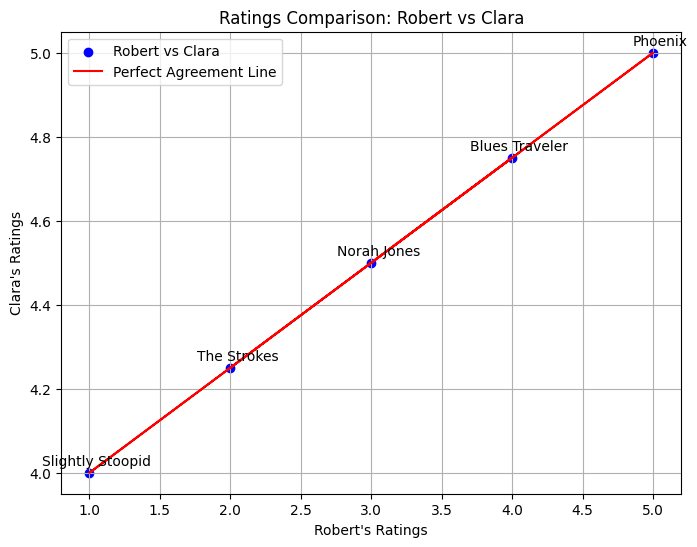

({'Blues Traveler',
  'Norah Jones',
  'Phoenix',
  'Slightly Stoopid',
  'The Strokes'},
 [3.0, 5.0, 1.0, 4.0, 2.0],
 [4.5, 5.0, 4.0, 4.75, 4.25])

In [46]:
# Plot ratings of the most similar users with movie names
user1, user2 = most_similar
common_items = set(users[user1].keys()) & set(users[user2].keys())
ratings1 = [users[user1][item] for item in common_items]
ratings2 = [users[user2][item] for item in common_items]

plt.figure(figsize=(8, 6))
plt.scatter(ratings1, ratings2, color='blue', label=f"{user1} vs {user2}")

# Annotate each point with the movie name
for i, item in enumerate(common_items):
    plt.annotate(item, (ratings1[i], ratings2[i]), textcoords="offset points", xytext=(5, 5), ha='center')

plt.plot(ratings1, ratings2, color='red', label="Perfect Agreement Line")
plt.title(f"Ratings Comparison: {user1} vs {user2}")
plt.xlabel(f"{user1}'s Ratings")
plt.ylabel(f"{user2}'s Ratings")
plt.legend()
plt.grid()
plt.show()
common_items , ratings1, ratings2

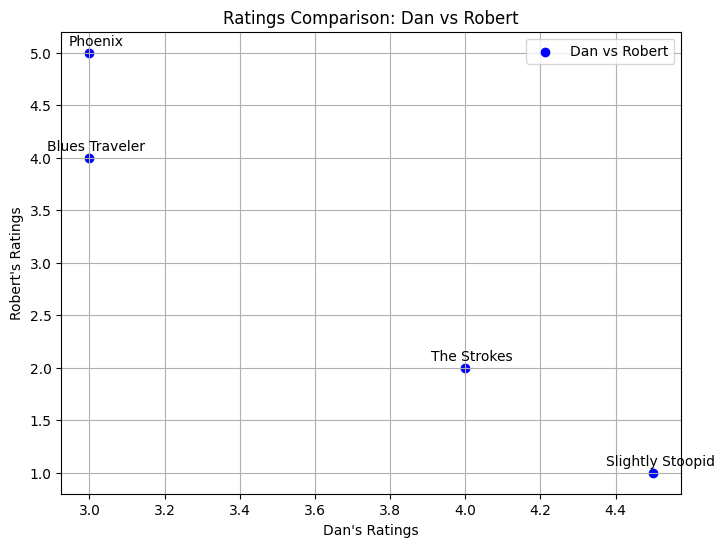

({'Blues Traveler', 'Phoenix', 'Slightly Stoopid', 'The Strokes'},
 [4.5, 3.0, 3.0, 4.0],
 [1.0, 5.0, 4.0, 2.0])

In [56]:
# Plot ratings of the least similar users
user1, user2 = least_similar
common_items = set(users[user1].keys()) & set(users[user2].keys())
ratings1 = [users[user1][item] for item in common_items]
ratings2 = [users[user2][item] for item in common_items]

plt.figure(figsize=(8, 6))
plt.scatter(ratings1, ratings2, color='blue', label=f"{user1} vs {user2}")
# Annotate each point with the movie name
for i, item in enumerate(common_items):
    plt.annotate(item, (ratings1[i], ratings2[i]), textcoords="offset points", xytext=(5, 5), ha='center')

# plt.plot(ratings1, ratings1, color='red', linestyle='--', label="Perfect Agreement Line")
plt.title(f"Ratings Comparison: {user1} vs {user2}")
plt.xlabel(f"{user1}'s Ratings")
plt.ylabel(f"{user2}'s Ratings")
plt.legend()
plt.grid()
plt.show()
common_items , ratings1, ratings2

## Conclusion

The covariance matrix is a fundamental tool in multivariate statistics. It summarizes the variance within each variable and the linear relationship between pairs of variables.

*   It's a square, symmetric matrix.
*   Diagonal elements represent variances.
*   Off-diagonal elements represent covariances.
*   Its eigenvectors and eigenvalues reveal the principal directions and magnitudes of variation in the data, forming the basis of PCA.
*   It can be easily computed using libraries like NumPy (`np.cov`).

Understanding the covariance matrix is crucial for various data analysis techniques, including dimensionality reduction, feature engineering, and understanding the structure of multivariate datasets.